In [1]:
import torch
from torch.autograd import Variable
from torch.autograd import Function
import numpy as np
from scipy import interpolate
import cv2
import matplotlib.pyplot as plt
from grad_cam import *
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
def preprocess_image(img):
	means=[0.485, 0.456, 0.406]
	stds=[0.229, 0.224, 0.225]

	preprocessed_img = img.copy()[: , :, ::-1]
	for i in range(3):
		preprocessed_img[:, :, i] = preprocessed_img[:, :, i] - means[i]
		preprocessed_img[:, :, i] = preprocessed_img[:, :, i] / stds[i]
	preprocessed_img = \
		np.ascontiguousarray(np.transpose(preprocessed_img, (2, 0, 1)))
	preprocessed_img = torch.from_numpy(preprocessed_img)
	preprocessed_img.unsqueeze_(0)
	input = Variable(preprocessed_img, requires_grad = True)
	return input

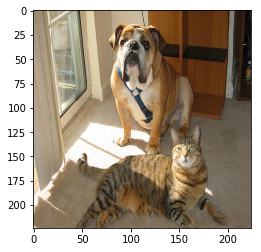

In [6]:
path = "/home/ubuntu/prj/sandbox/grad_cam/pytorch-grad-cam/examples/both.png"
img = Image.open(path).convert('RGB').resize((224, 224))
plt.imshow(img)

In [25]:
np.array(img).max(),np.array(img).mean()

(255, 115.18019238945578)

In [16]:
transforms.ToTensor()(img).max(),transforms.ToTensor()(img).min(),transforms.ToTensor()(img).mean()

(1.0, 0.0, 0.45168703970141777)

In [14]:
transforms.ToTensor()(img).shape

torch.Size([3, 224, 224])

In [33]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize])
input_img = torch.autograd.Variable(preprocess(img).unsqueeze(0))

In [34]:
input_img.data.mean()

0.010696745412055831

In [27]:
img2 = cv2.imread(path, 1)

In [22]:
img2.shape

(224, 224, 3)

In [24]:
img2.mean()

115.18019238945578

In [28]:
img2 = np.float32(cv2.resize(img2, (224, 224))) / 255

In [29]:
img2.mean(),img2.shape

(0.45168704, (224, 224, 3))

In [35]:
input_img2 = preprocess_image(img2)

In [36]:
input_img2.data.mean()

0.010696745412055831

In [38]:
input_img.size(), input_img2.size()

(torch.Size([1, 3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [39]:
((input_img.data - input_img2.data).numpy()**2).mean()

0.0